In [1]:
# 📦 Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay


In [2]:
# 🌸 Step 2: Load the Iris Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Display the first few rows
df = X.copy()
df['species'] = y
df['species'] = df['species'].map(dict(zip(range(3), iris.target_names)))
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


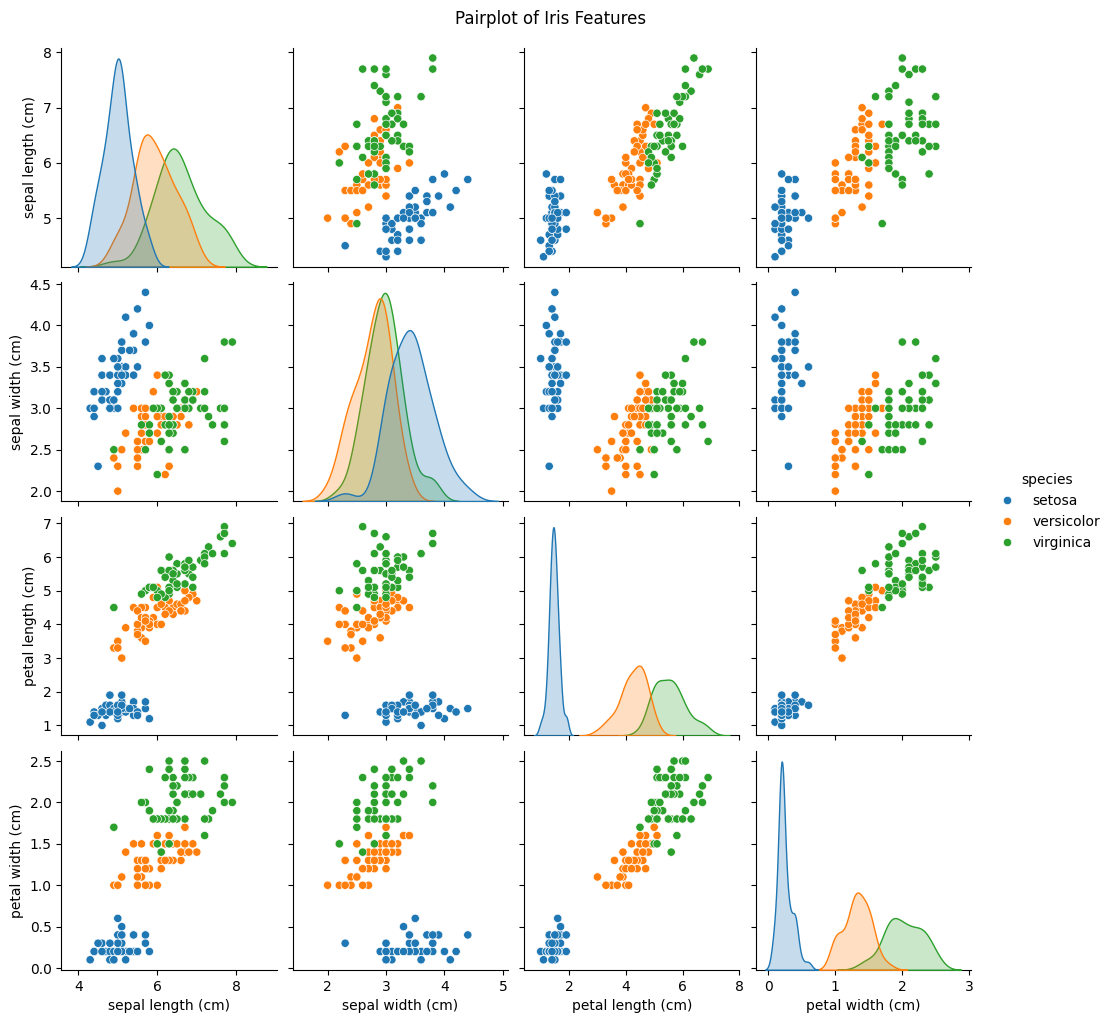

In [3]:
# 📊 Step 3: Data Visualization
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


In [4]:
# 📈 Step 4: Feature Scaling and Train/Test Split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, iris.target, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 120
Test samples: 30


Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



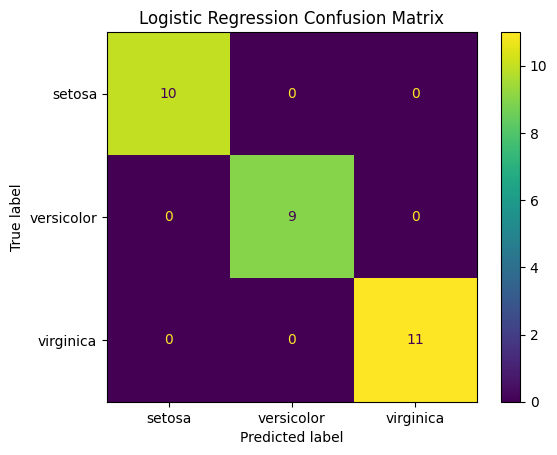

In [5]:
# 🔍 Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=iris.target_names))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=iris.target_names)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


KNN Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



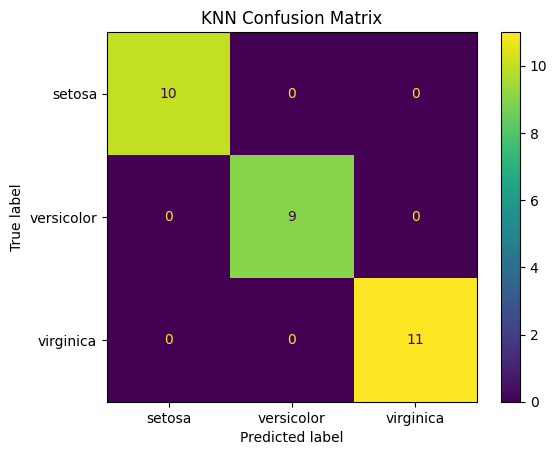

In [6]:
# 🔍 K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, target_names=iris.target_names))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=iris.target_names)
plt.title("KNN Confusion Matrix")
plt.show()
